## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
from sklearn.metrics import classification_report,confusion_matrix

## Data Loading

### File path

In [3]:
train_data_dir = 'input/train'
test_data_dir = 'input/test'

### Label Collection

In [4]:
class_labels = os.listdir(train_data_dir)
print(class_labels)

['Acne', 'benign', 'Dermatitis', 'Eczema']


### Listing Directory

In [5]:
for wdir in os.listdir('input'):
    print(wdir)
    wdir_total = 0
    for label in class_labels:
        total = len(os.listdir(os.path.join('input', wdir, label)))
        print(label, total)
        wdir_total +=total
    print(wdir,'-----',wdir_total)

test
Acne 26
benign 61
Dermatitis 32
Eczema 49
test ----- 168
train
Acne 116
benign 300
Dermatitis 140
Eczema 258
train ----- 814


In [6]:
nb_train_samples =814
nb_test_samples = 168
num_classes = 4
img_rows= 256
img_cols= 256
channel = 3

## pie-chart with datasize

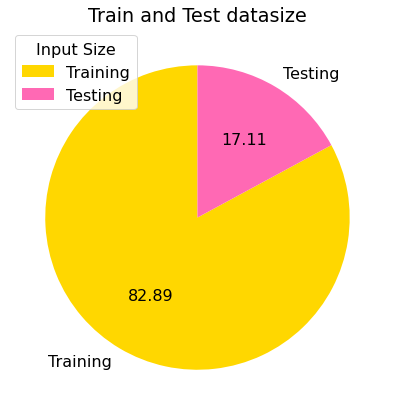

In [7]:
y = [nb_train_samples, nb_test_samples]
labels = ["Training", "Testing"]
colors = ["gold", "hotpink"]

plt.rcParams['font.size'] = '16'
plt.figure(figsize=(10,7))
plt.pie(y, labels = labels, startangle = 90, colors = colors,autopct="%.2f")
plt.title("Train and Test datasize")
plt.legend(title = "Input Size")
plt.show() 

## Data Visualization

In [8]:
Acne  = 'input/train/Acne/'
benign  = 'input/train/benign/'
Dermatitis  = 'input/train/Dermatitis/'
Eczema  = 'input/train/Eczema/'

In [9]:
dirlist=[Acne,benign,Dermatitis,Eczema]
filepaths=[]
for i in dirlist:
    filelist=os.listdir(i)
    for f in filelist:
        filepath=os.path.join (i,f)
        filepaths.append(filepath)

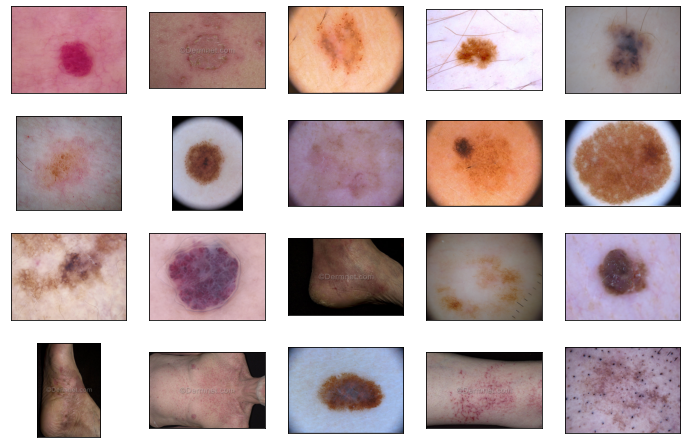

In [10]:
plt.figure(figsize=(12,8))
for i in range(20):
    random = np.random.randint(1,len(filepaths))
    plt.subplot(4,5,i+1)
    img=cv2.imread(filepaths[random])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Trai Data Loading

In [11]:
def load_training_data():
    #Load training images
    labels = os.listdir(train_data_dir)
    print(labels)
    total = len(labels)
    
    X_train = np.ndarray((nb_train_samples, img_rows, img_cols, 3), dtype = np.uint8)
    Y_train = np.zeros((nb_train_samples,), dtype = np.uint8)
    
    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(train_data_dir, label))
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            try:
                
                img = cv2.imread(os.path.join(train_data_dir, label, image_name), 1)
                img = np.array(cv2.resize(img, (img_rows,img_cols)))
                X_train[i] = img
                Y_train[i] = j
            except Exception as e:
                pass

            if i % 800 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1    
    print(str(i) +"-------"+ str(j))                
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_train = to_categorical(Y_train[:nb_train_samples], num_classes)

    return X_train, Y_train

### Test Data Loading

In [12]:
def load_validation_data():
    # Load validation images
    labels = os.listdir(test_data_dir)
    

    X_test = np.ndarray((nb_test_samples, img_rows, img_cols, 3), dtype=np.uint8)
    Y_test = np.zeros((nb_test_samples,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_test = os.listdir(os.path.join(test_data_dir, label))
        total = len(image_names_test)
        print(label, total)
        for image_name in image_names_test:
            try:
                img = cv2.imread(os.path.join(test_data_dir, label, image_name), 1)

                img = np.array(cv2.resize(img, (img_rows,img_cols)))

                X_test[i] = img
                Y_test[i] = j
            except Exception as e:
                
                pass

            if i % 200 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.');
    Y_test = to_categorical(Y_test[:nb_test_samples], num_classes)

    
    return X_test, Y_test

In [13]:
x_train, y_train = load_training_data()

['Acne', 'benign', 'Dermatitis', 'Eczema']
------------------------------
Creating training images...
------------------------------
Acne 116
Done: 0/116 images
benign 300
Dermatitis 140
Eczema 258
Done: 800/258 images
814-------4
Loading done.
Transform targets to keras compatible format.


In [14]:
x_test, y_test = load_validation_data()

------------------------------
Creating validation images...
------------------------------
Acne 26
Done: 0/26 images
benign 61
Dermatitis 32
Eczema 49
168
Loading done.
Transform targets to keras compatible format.


### Shape of the Data

In [15]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(814, 256, 256, 3) (814, 4) (168, 256, 256, 3) (168, 4)


### Data Normalization

In [16]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

## Model Building

### CNN (Convolutional Neural Network)

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.compile(loss= 'categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 254016)            0

### Model Training

In [21]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
26/26 [==============================] - 51s 2s/step - loss: 6.9412 - accuracy: 0.4103 - val_loss: 1.3839 - val_accuracy: 0.2857
Epoch 2/20
26/26 [==============================] - 52s 2s/step - loss: 1.0204 - accuracy: 0.6032 - val_loss: 1.2944 - val_accuracy: 0.5060
Epoch 3/20
26/26 [==============================] - 53s 2s/step - loss: 0.7296 - accuracy: 0.7064 - val_loss: 1.1807 - val_accuracy: 0.6012
Epoch 4/20
26/26 [==============================] - 55s 2s/step - loss: 0.5903 - accuracy: 0.7666 - val_loss: 1.0646 - val_accuracy: 0.5595
Epoch 5/20
26/26 [==============================] - 55s 2s/step - loss: 0.5527 - accuracy: 0.7801 - val_loss: 0.8794 - val_accuracy: 0.6548
Epoch 6/20
26/26 [==============================] - 55s 2s/step - loss: 0.4300 - accuracy: 0.8464 - val_loss: 0.7093 - val_accuracy: 0.7024
Epoch 7/20
26/26 [==============================] - 54s 2s/step - loss: 0.3789 - accuracy: 0.8686 - val_loss: 0.6608 - val_accuracy: 0.7619
Epoch 8/20
26/26 [==

## Accuracy and Loss Plot-Graphs

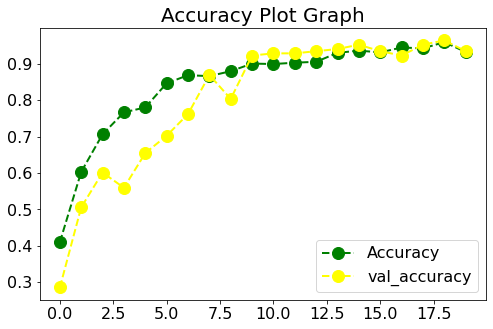

In [30]:
plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(history.history["val_accuracy"],color='yellow', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title("Accuracy Plot Graph",fontsize=20)
plt.legend(["Accuracy","val_accuracy"])
plt.show()

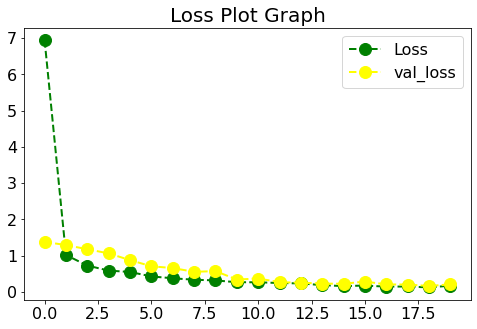

In [32]:
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(history.history["val_loss"],color='yellow', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title("Loss Plot Graph",fontsize=20)
plt.legend(["Loss","val_loss"])
plt.show()

### Model Prediction

In [24]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)

6/6 [==============================] - 3s 426ms/step


In [25]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

168

In [26]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

168

## Result Analysis

### Classification Report

In [27]:
print(classification_report(y_true=y_true,y_pred=y_predict,target_names=['Acne', 'benign', 'Dermatitis', 'Eczema']))

              precision    recall  f1-score   support

        Acne       0.90      0.96      0.93        27
      benign       0.96      0.90      0.93        61
  Dermatitis       0.85      0.88      0.86        32
      Eczema       0.98      1.00      0.99        48

    accuracy                           0.93       168
   macro avg       0.92      0.93      0.93       168
weighted avg       0.94      0.93      0.93       168



### Confusion Matrix

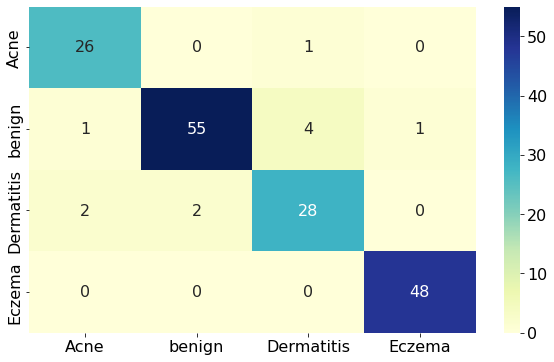

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=y_predict),
            annot=True,
            fmt=".4g",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cmap="YlGnBu")
plt.show()

## Model Saving

In [29]:
model.save("model/CNN_model.h5")

# Thank You !